In [1]:
%pylab inline

import rdf_dm as r

from rdflib import *

from pandas import DataFrame, Series
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import imp
imp.reload(r.association)
imp.reload(r)

<module 'rdf_dm' from '/home/mikko/PycharmProjects/rdf_dm/rdf_dm/__init__.py'>

In [3]:
%time surma = r.read_graph_from_sparql('http://ldf.fi/narc-menehtyneet1939-45/sparql')

CPU times: user 2min 16s, sys: 4.54 s, total: 2min 21s
Wall time: 3min 25s


In [4]:
fit, fru = r.freq_items_by_class(surma, URIRef('http://xmlns.com/foaf/0.1/Person'), minsup2=5, minconf=50, minlift=130)

In [5]:
len(fit)

191

In [6]:
fit[0]

([['sss:kansalaisuus', 'ss:kansalaisuus/Suomi'], ['rdf:type', 'foaf:Person']],
 0.996146)

In [7]:
len(fru)

1320

In [8]:
fru[0]

{'antecedents': [['sss:siviilisaeaety', 'ss:siviilisaeaety/Naimaton'],
  ['rdf:type', 'foaf:Person']],
 'confidence': 0.992152,
 'consequents': [['sss:lasten_lukumaeaerae', '0']],
 'lift': 1.35484,
 'support': 0.626098}

In [9]:
rules = DataFrame(fru)
rules.describe()

,confidence,lift,support
count,1320.000000,1320.000000,1320.000000
mean,0.914991,3.410874,0.130316
std,0.085666,4.588170,0.137068
min,0.618637,1.333770,0.031057
25%,0.874184,1.357320,0.055673
50%,0.903206,1.384575,0.072537
75%,0.993767,1.428160,0.119731
max,0.994910,16.793300,0.626098


In [10]:
pd.set_option('max_colwidth',300)
rules.head()

,antecedents,confidence,consequents,lift,support
0,"[[sss:siviilisaeaety, ss:siviilisaeaety/Naimaton], [rdf:type, foaf:Person]]",0.992152,"[[sss:lasten_lukumaeaerae, 0]]",1.35484,0.626098
1,"[[sss:lasten_lukumaeaerae, 0], [rdf:type, foaf:Person]]",0.854974,"[[sss:siviilisaeaety, ss:siviilisaeaety/Naimaton]]",1.35484,0.626098
2,"[[sss:siviilisaeaety, ss:siviilisaeaety/Naimaton], [sss:kansalaisuus, ss:kansalaisuus/Suomi], [rdf:type, foaf:Person]]",0.993915,"[[sss:lasten_lukumaeaerae, 0]]",1.35725,0.624430
3,"[[sss:lasten_lukumaeaerae, 0], [sss:kansalaisuus, ss:kansalaisuus/Suomi], [rdf:type, foaf:Person]]",0.854778,"[[sss:siviilisaeaety, ss:siviilisaeaety/Naimaton]]",1.35453,0.624430
4,"[[sss:siviilisaeaety, ss:siviilisaeaety/Naimaton], [sss:kansalaisuus, ss:kansalaisuus/Suomi]]",0.993915,"[[sss:lasten_lukumaeaerae, 0]]",1.35725,0.624430


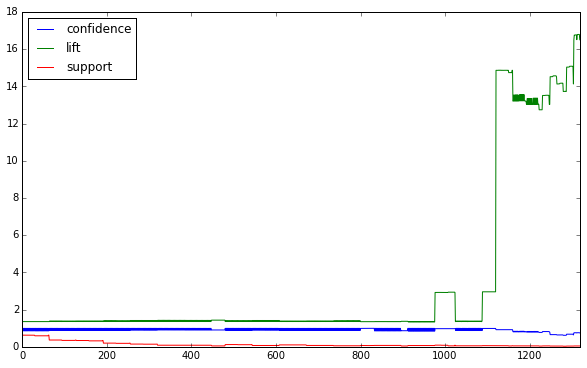

In [11]:
rules.plot(figsize=(10, 6))

In [12]:
rules.sort(columns=['lift', 'confidence'], ascending=False).head()

,antecedents,confidence,consequents,lift,support
1314,"[[sss:hautauskunta, ss:kunnat/k0005], [sss:sukupuoli, ss:sukupuoli/Mies], [sss:kansallisuus, ss:kansallisuus/Suomi], [rdf:type, foaf:Person]]",0.756883,"[[sss:hautausmaa, ss:hautausmaat/0005_1]]",16.7933,0.044416
1315,"[[sss:hautauskunta, ss:kunnat/k0005], [sss:sukupuoli, ss:sukupuoli/Mies], [sss:kansallisuus, ss:kansallisuus/Suomi], [sss:kansalaisuus, ss:kansalaisuus/Suomi], [rdf:type, foaf:Person]]",0.756883,"[[sss:hautausmaa, ss:hautausmaat/0005_1]]",16.7933,0.044416
1316,"[[sss:hautauskunta, ss:kunnat/k0005], [sss:sukupuoli, ss:sukupuoli/Mies], [sss:kansallisuus, ss:kansallisuus/Suomi], [sss:kansalaisuus, ss:kansalaisuus/Suomi]]",0.756883,"[[sss:hautausmaa, ss:hautausmaat/0005_1]]",16.7933,0.044416
1317,"[[sss:hautauskunta, ss:kunnat/k0005], [sss:sukupuoli, ss:sukupuoli/Mies], [sss:kansallisuus, ss:kansallisuus/Suomi]]",0.756883,"[[sss:hautausmaa, ss:hautausmaat/0005_1]]",16.7933,0.044416
1312,"[[sss:hautauskunta, ss:kunnat/k0005], [sss:sukupuoli, ss:sukupuoli/Mies], [sss:kansalaisuus, ss:kansalaisuus/Suomi], [rdf:type, foaf:Person]]",0.756475,"[[sss:hautausmaa, ss:hautausmaat/0005_1]]",16.7842,0.044416


In [13]:
#print(rules.sort(columns=['lift', 'confidence'], ascending=False).head().values)
#pd.set_option('display.width', 2000)
#pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth',300)
#rules.sort(columns=['lift', 'confidence'], ascending=False)[['antecedents', 'consequents', 'lift']].head()
sorted_rules = rules.sort(columns=['lift'], ascending=False)[['antecedents', 'consequents', 'lift', 'confidence', 'support']]
sorted_rules.head()

,antecedents,consequents,lift,confidence,support
1317,"[[sss:hautauskunta, ss:kunnat/k0005], [sss:sukupuoli, ss:sukupuoli/Mies], [sss:kansallisuus, ss:kansallisuus/Suomi]]","[[sss:hautausmaa, ss:hautausmaat/0005_1]]",16.7933,0.756883,0.044416
1316,"[[sss:hautauskunta, ss:kunnat/k0005], [sss:sukupuoli, ss:sukupuoli/Mies], [sss:kansallisuus, ss:kansallisuus/Suomi], [sss:kansalaisuus, ss:kansalaisuus/Suomi]]","[[sss:hautausmaa, ss:hautausmaat/0005_1]]",16.7933,0.756883,0.044416
1315,"[[sss:hautauskunta, ss:kunnat/k0005], [sss:sukupuoli, ss:sukupuoli/Mies], [sss:kansallisuus, ss:kansallisuus/Suomi], [sss:kansalaisuus, ss:kansalaisuus/Suomi], [rdf:type, foaf:Person]]","[[sss:hautausmaa, ss:hautausmaat/0005_1]]",16.7933,0.756883,0.044416
1314,"[[sss:hautauskunta, ss:kunnat/k0005], [sss:sukupuoli, ss:sukupuoli/Mies], [sss:kansallisuus, ss:kansallisuus/Suomi], [rdf:type, foaf:Person]]","[[sss:hautausmaa, ss:hautausmaat/0005_1]]",16.7933,0.756883,0.044416
1313,"[[sss:hautauskunta, ss:kunnat/k0005], [sss:sukupuoli, ss:sukupuoli/Mies], [sss:kansalaisuus, ss:kansalaisuus/Suomi]]","[[sss:hautausmaa, ss:hautausmaat/0005_1]]",16.7842,0.756475,0.044416


In [14]:
list(surma[:URIRef('http://ldf.fi/schema/narc-menehtyneet1939-45/hautausmaa'):])[:5]

[(rdflib.term.URIRef('http://ldf.fi/narc-menehtyneet1939-45/p254452'),
  rdflib.term.URIRef('http://ldf.fi/narc-menehtyneet1939-45/hautausmaat/0408_3')),
 (rdflib.term.URIRef('http://ldf.fi/narc-menehtyneet1939-45/p526481'),
  rdflib.term.URIRef('http://ldf.fi/narc-menehtyneet1939-45/hautausmaat/0681_1')),
 (rdflib.term.URIRef('http://ldf.fi/narc-menehtyneet1939-45/p501042'),
  rdflib.term.URIRef('http://ldf.fi/narc-menehtyneet1939-45/hautausmaat/0245_1')),
 (rdflib.term.URIRef('http://ldf.fi/narc-menehtyneet1939-45/p15380'),
  rdflib.term.URIRef('http://ldf.fi/narc-menehtyneet1939-45/hautausmaat/0801_1')),
 (rdflib.term.URIRef('http://ldf.fi/narc-menehtyneet1939-45/p534063'),
  rdflib.term.URIRef('http://ldf.fi/narc-menehtyneet1939-45/hautausmaat/0737_1'))]

In [15]:
#sorted_rules[sorted_rules['antecedents'].str.contains('kansa')].head()
#sorted_rules[['rdf:type', 'foaf:Person'] in sorted_rules.antecedents]